In [1]:
import numpy

from finance_utils.namedtuples import *
from finance_utils.uniontypes import *
from finance_utils.asset.spot.base import Spot
from finance_utils.asset.spot.strategy import SpotCostAveragingPlan
from finance_utils.process.prices.gbm import RVDecoupledGBM, GBM, NormalDistribution
from finance_utils.trader.base import Trader
from finance_utils.trader.utility import *

from matplotlib import pyplot

from data_utils.stochastic_utils.distributions.nonParametricDistribution import HistogramDist, KernelMixDist, SmoothHisDist
from easy_datetime.timestamp import TimeStamp
import tqdm

from matplotlib import pyplot

In [2]:
base_trader = Trader("trader", 20000 * 12, "2000-1-1")

In [3]:
stock = Spot("10001", 100, TradeDelta("day", 1))

In [4]:
stock_process = GBM(stock.name, 1, 0.03/366, 0.015, 366, "2024-1-1", "day", 1)
multi_pathing = stock_process.multi_pathing(base_trader, stock, 100)

In [5]:
scap = SpotCostAveragingPlan(multi_pathing, stock)

In [6]:
scap_test = scap.monthly_cap(10000, [1])
plist = scap_test.spot_slices
ylist = scap_test.yield_slices

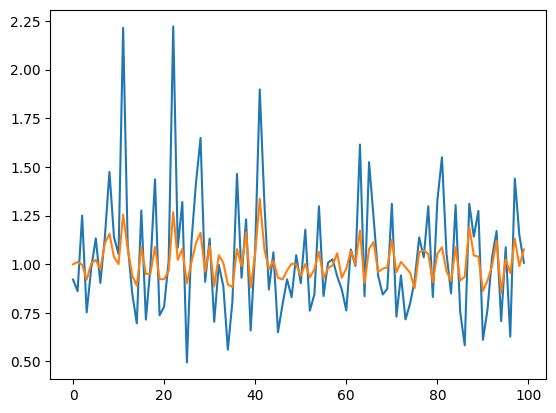

In [7]:
pyplot.plot(plist[-1])
pyplot.plot(ylist[-1])
pyplot.show()

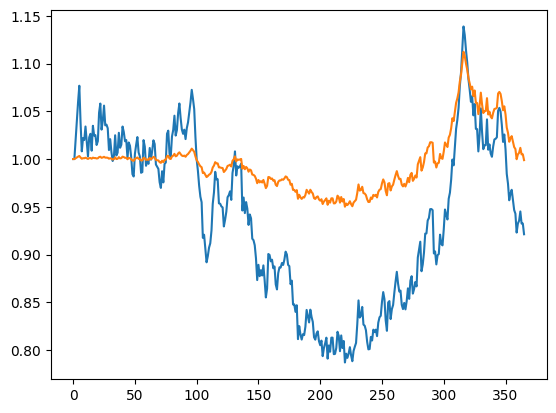

In [8]:
pyplot.plot([i[0] for i in plist])
pyplot.plot([i[0] for i in ylist])
pyplot.show()

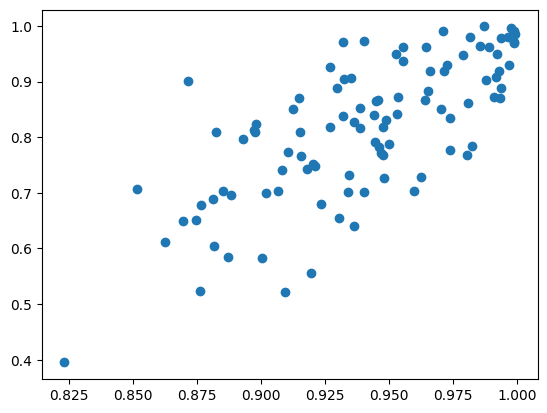

In [9]:
pyplot.scatter(*scap_test.max_drawdown())
pyplot.show()

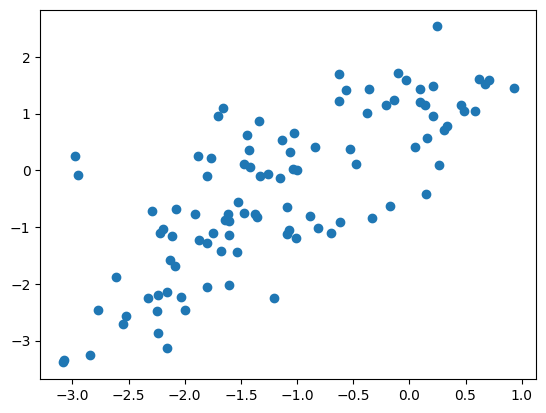

In [10]:
pyplot.scatter(*scap_test.mean_sharp())
pyplot.show()

In [11]:
s1_test = scap.price_qualified_cap(10000, 0.9, 1.1)

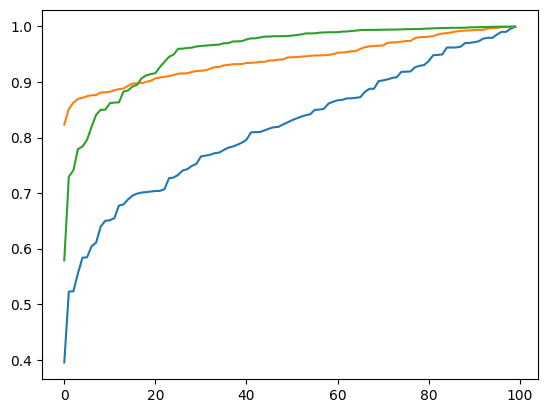

In [12]:
pyplot.plot(sorted(scap_test.max_drawdown().spot))
pyplot.plot(sorted(scap_test.max_drawdown().strategy))
pyplot.plot(sorted(s1_test.max_drawdown().strategy))
pyplot.show()

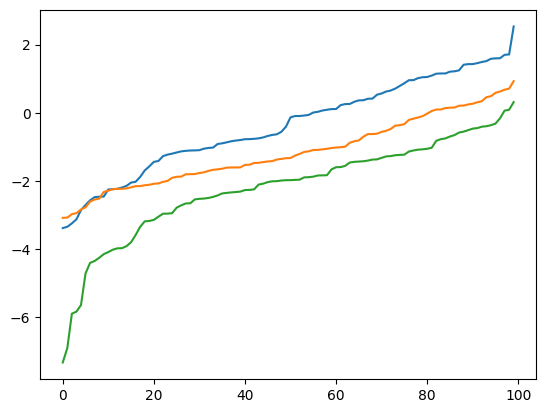

In [13]:
pyplot.plot(sorted(scap_test.mean_sharp().spot))
pyplot.plot(sorted(scap_test.mean_sharp().strategy))
pyplot.plot(sorted(s1_test.mean_sharp().strategy))
pyplot.show()

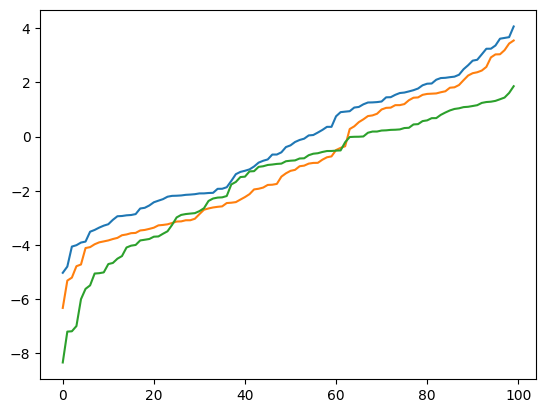

In [14]:
pyplot.plot(sorted(scap_test.slice_sharp().spot))
pyplot.plot(sorted(scap_test.slice_sharp().strategy))
pyplot.plot(sorted(s1_test.slice_sharp().strategy))
pyplot.show()

In [19]:
print(scap_test.slice_utility_ratio(0.5, 0.1, positive_utility_function=LogUtilityFunction()))
print(s1_test.slice_utility_ratio(0.5, 0.1, positive_utility_function=LogUtilityFunction()))

slice_tuple(strategy=1.2988460890722011, spot=2.1368250384721)
slice_tuple(strategy=1.2011568264374122, spot=2.1368250384721)


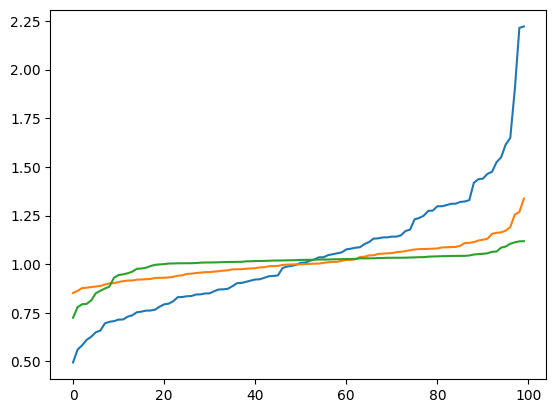

In [17]:
pyplot.plot(sorted(scap_test.spot_slices[-1]))
pyplot.plot(sorted(scap_test.yield_slices[-1]))
pyplot.plot(sorted(s1_test.yield_slices[-1]))
pyplot.show()